<a href="https://colab.research.google.com/github/rulogar1234/nuclio-1/blob/develop/1er_Entregable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [647]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [648]:
#importamos librería
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,MinMaxScaler

import folium
import plotly.express as px

In [649]:
#leemos el fichero de renfe
df_bmw1=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/1stEntregable/bmw_pricing_v3.csv",sep=",")
df_bmw1.head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01


In [650]:
#Todos los coches son BMW, elimino la columna de la marca
del df_bmw1['marca']

In [651]:
#primera vista a posibles outlayers
df_bmw1.describe().T

,count,mean,std,min,25%,50%,75%,max
km,4841.0,140959.347862,60208.534313,-64.0,102884.0,141080.0,175217.0,1000376.0
potencia,4842.0,128.981826,38.994839,0.0,100.0,120.0,135.0,423.0
precio,4837.0,15831.920612,9222.630708,100.0,10800.0,14200.0,18600.0,178500.0


In [652]:
df_bmw1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   modelo                       4840 non-null   object 
 1   km                           4841 non-null   float64
 2   potencia                     4842 non-null   float64
 3   fecha_registro               2420 non-null   object 
 4   tipo_gasolina                4838 non-null   object 
 5   color                        4398 non-null   object 
 6   tipo_coche                   3383 non-null   object 
 7   volante_regulable            4839 non-null   object 
 8   aire_acondicionado           4357 non-null   object 
 9   camara_trasera               4841 non-null   object 
 10  asientos_traseros_plegables  1452 non-null   object 
 11  elevalunas_electrico         4841 non-null   object 
 12  bluetooth                    4115 non-null   object 
 13  gps               

# **FECHAS**

In [653]:
#convertimos las fechas
for i in ["fecha_registro","fecha_venta"]:
    df_bmw1[i]=pd.to_datetime(df_bmw1[i])

# **DUPLICADOS**

In [654]:
#verificamos duplicados
df_bmw1[df_bmw1.duplicated(keep='first')]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


In [655]:
df_bmw1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   modelo                       4840 non-null   object        
 1   km                           4841 non-null   float64       
 2   potencia                     4842 non-null   float64       
 3   fecha_registro               2420 non-null   datetime64[ns]
 4   tipo_gasolina                4838 non-null   object        
 5   color                        4398 non-null   object        
 6   tipo_coche                   3383 non-null   object        
 7   volante_regulable            4839 non-null   object        
 8   aire_acondicionado           4357 non-null   object        
 9   camara_trasera               4841 non-null   object        
 10  asientos_traseros_plegables  1452 non-null   object        
 11  elevalunas_electrico         4841 non-null 

In [656]:
#miramos cuantos registros tiene nuestro dataset
len(df_bmw1)

4843

# **OUTLAYERS**

modelo 
 320                752
520                633
318                568
X3                 438
116                358
                  ... 
M135                 1
225                  1
i8                   1
630                  1
214 Gran Tourer      1
Name: modelo, Length: 76, dtype: int64 

[[<Axes: title={'center': 'km'}>]]
[[<Axes: title={'center': 'potencia'}>]]
tipo_gasolina 
 diesel           4631
petrol            191
hybrid_petrol       8
Diesel              5
electro             3
Name: tipo_gasolina, dtype: int64 

color 
 black     1499
grey      1070
blue       647
white      484
brown      302
silver     292
red         47
beige       37
green       14
orange       6
Name: color, dtype: int64 

tipo_coche 
 estate         1107
sedan           821
suv             755
hatchback       488
subcompact       77
coupe            76
convertible      30
van              29
Name: tipo_coche, dtype: int64 

volante_regulable 
 True     2662
False    2177
Name: volante_regul

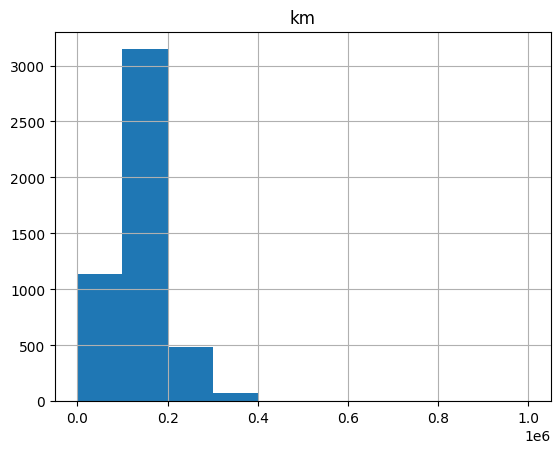

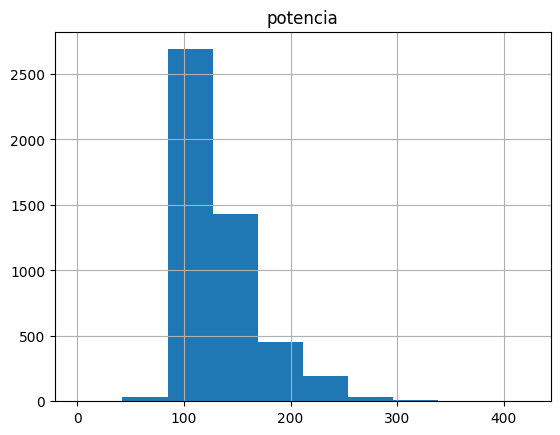

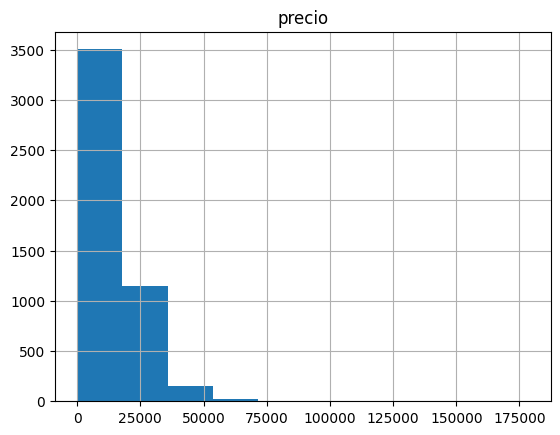

In [657]:
 for i in df_bmw1:
  if (df_bmw1[i].dtype.kind=="f") or (df_bmw1[i].dtype.kind=="i"):
    print(df_bmw1.hist(i))
  elif df_bmw1[i].dtype.kind == "O":
    print(i,'\n', df_bmw1[i].value_counts(), '\n')

# OUTLAYERS **NUMERICOS**

[[<Axes: title={'center': 'km'}>]]
[[<Axes: title={'center': 'potencia'}>]]
[[<Axes: title={'center': 'precio'}>]]


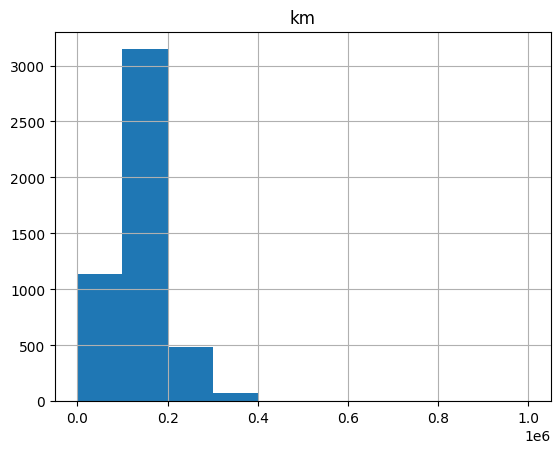

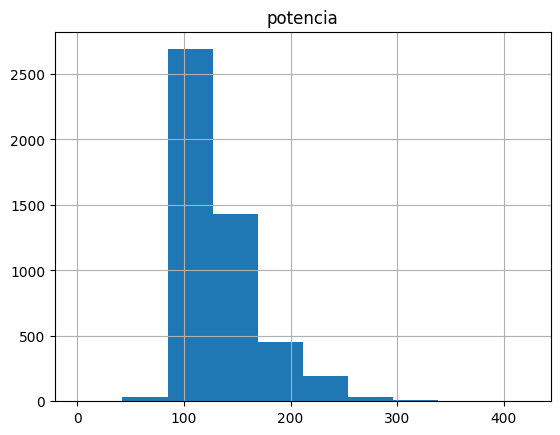

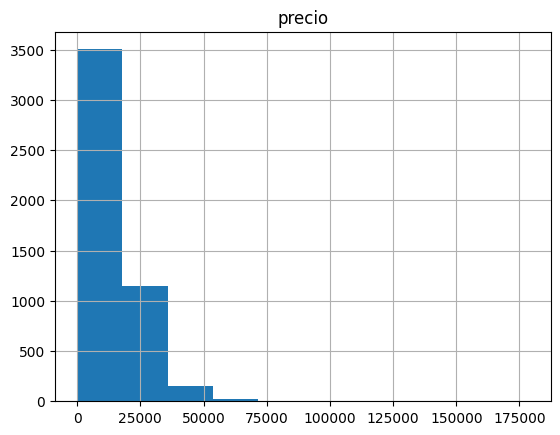

In [658]:
#HACEMOS HISTOGRAMAS PARA DETECTAR POSIBLES OUTLAYERS
for i in df_bmw1:
  if (df_bmw1[i].dtype.kind=="f") or (df_bmw1[i].dtype.kind=="i"):
    print(df_bmw1.hist(i))

# OUTLAYERS **NUMERICOS**

In [659]:
#Por debajo si los precios son más bajos de 500 los borramos
df_bmw1[(df_bmw1['precio'] < 500) | (df_bmw1['precio'] > 70000)]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
90,i8,12402.0,170.0,NaT,hybrid_petrol,grey,coupe,True,True,False,False,False,False,False,True,95200.0,2018-04-01
565,320,179358.0,120.0,2013-06-01,diesel,black,NaN,False,True,False,NaN,False,False,True,True,100.0,2018-03-01
630,318,147558.0,105.0,2014-11-01,NaN,white,estate,False,NaN,False,NaN,False,False,False,True,100.0,2018-03-01
879,318,134156.0,105.0,2014-06-01,diesel,grey,estate,False,True,False,NaN,False,False,False,True,100.0,2018-04-01
1255,320,170381.0,135.0,NaT,diesel,silver,NaN,True,True,False,NaN,False,False,True,False,100.0,2018-05-01
1513,520,358332.0,100.0,NaT,diesel,blue,NaN,False,False,False,NaN,True,False,True,False,400.0,2018-07-01
1558,520,358333.0,100.0,NaT,diesel,blue,estate,False,False,False,NaN,True,NaN,True,NaN,400.0,2018-07-01
1832,116,174524.0,85.0,2014-07-01,diesel,blue,hatchback,False,True,False,NaN,False,False,True,NaN,100.0,2018-03-01
2473,525,230578.0,85.0,1997-07-01,diesel,NaN,sedan,False,NaN,False,False,False,False,True,NaN,200.0,2018-08-01
2574,525,229880.0,85.0,1997-07-01,diesel,black,sedan,False,NaN,False,False,False,NaN,True,False,200.0,2018-08-01


In [660]:
#los borramos
df_bmw1=df_bmw1[(df_bmw1['precio'] <= 70000) & (df_bmw1['precio'] >= 500) ]

#quitar precios bajos

<ipython-input-661-b9f93b6dc0ce>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_bmw1['precio'])


<Axes: xlabel='precio', ylabel='Density'>

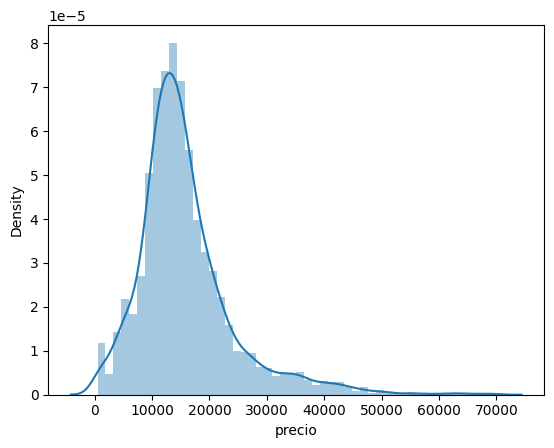

In [661]:
#verificamos histograma
#df_bmw1['precio'].hist()
sns.distplot(df_bmw1['precio'])

In [662]:
#miramos cuantos coches hay más altos de 300 CV omás pequeños de 50 CV
df_bmw1[(df_bmw1['potencia'] > 300) | (df_bmw1['potencia'] < 50)]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
1,M4,13929.0,317.0,NaT,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
67,M3,29925.0,309.0,NaT,petrol,silver,NaN,True,True,False,NaN,True,True,True,True,47000.0,2018-04-01
72,M4,69410.0,317.0,2015-02-01,petrol,white,NaN,True,True,False,NaN,False,True,True,True,53600.0,2018-03-01
73,M3,170550.0,309.0,NaT,petrol,grey,coupe,True,True,False,NaN,True,False,True,True,28000.0,2018-03-01
93,M3,99283.0,309.0,NaT,petrol,silver,NaN,False,False,False,NaN,True,False,True,True,28600.0,2018-04-01
139,M3,169970.0,309.0,2011-03-01,petrol,grey,coupe,True,True,False,NaN,True,False,True,True,35700.0,2018-08-01
1796,i3,152328.0,25.0,NaT,hybrid_petrol,black,NaN,False,True,False,NaN,False,False,True,NaN,20300.0,2018-04-01
1925,i3,152470.0,25.0,NaT,hybrid_petrol,black,hatchback,False,True,False,NaN,False,False,True,True,15500.0,2018-03-01
2944,M3,33670.0,317.0,2014-03-01,petrol,blue,sedan,True,True,False,NaN,False,True,True,True,51200.0,2018-04-01
3092,M3,39250.0,317.0,2015-11-01,petrol,black,sedan,True,True,False,NaN,False,True,True,True,52400.0,2018-05-01


In [663]:
#los borramos
df_bmw1=df_bmw1[(df_bmw1['potencia'] >= 50) & (df_bmw1['potencia'] <= 300)]

<ipython-input-664-ea9f6a078f34>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_bmw1['potencia'])


<Axes: xlabel='potencia', ylabel='Density'>

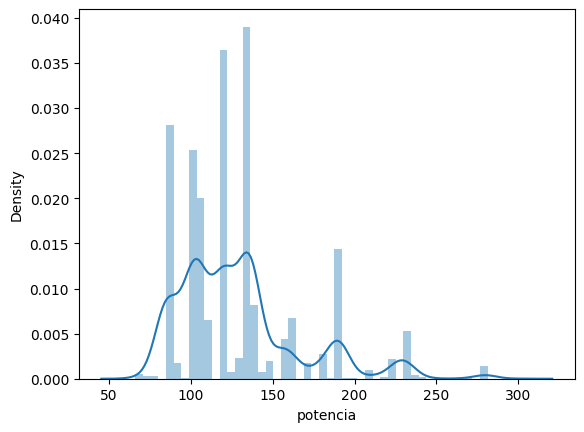

In [664]:
#verificamos histograma
sns.distplot(df_bmw1['potencia'])

In [665]:
#miramos cuantos coches hay más altos de 400000 km
df_bmw1[df_bmw1['km'] > 400000]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
557,520,484615.0,120.0,2011-02-01,diesel,blue,estate,True,True,False,NaN,False,NaN,True,False,8300.0,2018-03-01
1573,320,400654.0,110.0,2006-12-01,diesel,black,estate,False,False,True,NaN,False,False,True,False,1800.0,2018-07-01
2350,318,477571.0,85.0,NaT,diesel,grey,NaN,False,True,False,NaN,False,True,False,False,1200.0,2018-07-01
3198,320,405816.0,100.0,2000-02-01,diesel,blue,sedan,False,False,False,NaN,False,NaN,True,False,500.0,2018-05-01
3732,118,1000376.0,90.0,2005-03-01,diesel,NaN,NaN,True,False,False,False,False,NaN,True,False,1400.0,2018-06-01


In [666]:
#los borramos
df_bmw1=df_bmw1[df_bmw1['km'] < 400000]

<ipython-input-667-a338ed32918a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_bmw1['km'])


<Axes: xlabel='km', ylabel='Density'>

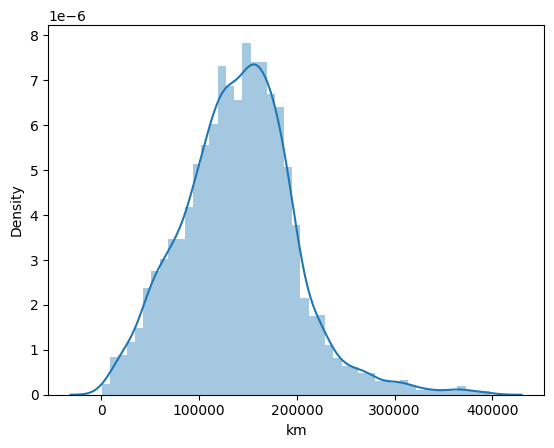

In [667]:
#verificamos histograma
sns.distplot(df_bmw1['km'])

# COHERENCIA DE LOS DATOS CATEGORICOS EXAMEN **MULTIVARIABLE**

In [668]:
#preparamos un dataframe para modelos por tipos de coches
df_tipo_modelo = pd.DataFrame({'modelo': df_bmw1['modelo'], 'tipo_coche': df_bmw1['tipo_coche']})
df_tipo_modelo_sin_nulos=df_tipo_modelo.dropna()


In [669]:
#función para calcular la moda
def calcular_moda(x):
    counts = x.value_counts()  # Contar la frecuencia de cada valor
    moda = counts[counts == counts.max()]  # Obtener los valores con la máxima frecuencia (la moda)
    return moda

In [670]:
moda_por_grupo = df_tipo_modelo_sin_nulos.groupby('modelo')['tipo_coche'].apply(calcular_moda)

In [671]:
moda_por_grupo = pd.DataFrame(moda_por_grupo)
moda_por_grupo = moda_por_grupo.reset_index()
moda_por_grupo

,modelo,level_1,tipo_coche
0,Active Tourer,van,1
1,114,hatchback,6
2,116,hatchback,190
3,118,hatchback,79
4,120,hatchback,16
...,...,...,...
70,X5 M50,suv,3
71,X6,suv,30
72,X6 M,suv,6
73,Z4,convertible,5


In [672]:
del moda_por_grupo['tipo_coche']
moda_por_grupo.rename(columns={'level_1': 'tipo_coche'},inplace=True)
moda_por_grupo

,modelo,tipo_coche
0,Active Tourer,van
1,114,hatchback
2,116,hatchback
3,118,hatchback
4,120,hatchback
...,...,...
70,X5 M50,suv
71,X6,suv
72,X6 M,suv
73,Z4,convertible


In [673]:
#función para cambiar el tipo de coche en función del modelo
def tipo_coche_modelo(row):
  for i in range(len(moda_por_grupo)):
    if row['modelo'] == moda_por_grupo.iloc[i,0]:
      return moda_por_grupo.iloc[i,1]
  return None

In [674]:
df_bmw1['tipo'] = df_bmw1.apply(tipo_coche_modelo, axis=1)

In [675]:
del df_bmw1['tipo_coche']
df_bmw1.rename(columns={'tipo': 'tipo_coche'}, inplace=True)
df_bmw1

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,tipo_coche
0,118,140411.0,100.0,2012-02-01,diesel,black,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01,hatchback
2,320,183297.0,120.0,2012-04-01,diesel,white,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01,estate
3,420,128035.0,135.0,NaT,diesel,red,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01,coupe
4,425,97097.0,160.0,NaT,diesel,silver,True,True,False,False,False,True,True,True,33400.0,2018-04-01,coupe
5,335,152352.0,225.0,2011-05-01,petrol,black,True,True,False,False,True,True,True,True,17100.0,2018-02-01,coupe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,218 Gran Tourer,39743.0,110.0,NaT,diesel,black,False,True,False,NaN,False,False,True,False,14600.0,2018-08-01,van
4839,218 Active Tourer,49832.0,100.0,2015-06-01,diesel,grey,False,True,False,NaN,False,False,True,True,17500.0,2018-08-01,van
4840,218 Gran Tourer,19633.0,110.0,2015-10-01,diesel,grey,False,True,False,NaN,False,False,True,True,17000.0,2018-09-01,van
4841,218 Active Tourer,27920.0,110.0,2016-04-01,diesel,brown,True,True,False,False,False,False,True,True,22700.0,2018-09-01,van


# **OUTLAYERS** CATEGORICOS ENCODING

> Bloque con sangría



In [676]:
 for i in df_bmw1:
  if df_bmw1[i].dtype.kind == "O":
    print(i,'\n', df_bmw1[i].value_counts(), '\n')

modelo 
 320                746
520                628
318                563
X3                 435
116                357
                  ... 
M135                 1
M3                   1
225                  1
630                  1
214 Gran Tourer      1
Name: modelo, Length: 73, dtype: int64 

tipo_gasolina 
 diesel           4601
petrol            178
Diesel              5
hybrid_petrol       5
electro             3
Name: tipo_gasolina, dtype: int64 

color 
 black     1487
grey      1061
blue       635
white      480
brown      302
silver     287
red         46
beige       37
green       14
orange       6
Name: color, dtype: int64 

volante_regulable 
 True     2639
False    2153
Name: volante_regulable, dtype: int64 

aire_acondicionado 
 True     3439
False     877
Name: aire_acondicionado, dtype: int64 

camara_trasera 
 False    3827
True      967
Name: camara_trasera, dtype: int64 

asientos_traseros_plegables 
 False    1136
True      301
Name: asientos_traseros_plegabl

In [677]:
df_bmw1.shape

(4796, 17)

In [678]:
#la función hace lo siguiente, crea una lista vacía, hace un conteo de los valores del dataset, se hace un reset index para que se vuelva un dataset
#luego se recorre el data set y se pregunta si el nuevo dataset que tiene los conteos de los valores es menor al umbral, en caso sea así se agrega en una lista
def obten_lista_eliminar(dataset, columna, umbral):
  lista_borrar= []
  tabla=dataset[columna].value_counts().reset_index()
  for i in range(len(tabla)):
    if (tabla.iloc[i][columna]) < umbral:
      lista_borrar.append(tabla.iloc[i]["index"])
  return lista_borrar

In [679]:
def eliminar_lista_df(dataset, columna, lista_eliminar):
  dataset.drop(dataset[dataset[columna].isin(lista_eliminar)].index, inplace=True)

In [680]:
df_bmw2 = df_bmw1.copy()

In [681]:
#tipo de gasolina
lista_eliminar_tipo_gasolina = obten_lista_eliminar(df_bmw2, "tipo_gasolina", 20)
lista_eliminar_tipo_gasolina

['Diesel', 'hybrid_petrol', 'electro']

In [682]:
df_bmw2['tipo_gasolina'].value_counts()

diesel           4601
petrol            178
Diesel              5
hybrid_petrol       5
electro             3
Name: tipo_gasolina, dtype: int64

In [683]:
#hacemos filtro coches diesel para poner los Diesel igual
filtro_diesel=df_bmw2["tipo_gasolina"]=="Diesel"
df_bmw2_diesel = df_bmw2.loc[filtro_diesel]
df_bmw2_diesel

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,tipo_coche
658,320,164900.0,120.0,NaT,Diesel,grey,False,True,True,NaN,True,True,True,False,11800.0,2018-03-01,estate
664,320,163777.0,120.0,2014-10-01,Diesel,black,False,True,False,NaN,False,NaN,True,True,12700.0,2018-03-01,estate
695,320,178944.0,122.0,2013-12-01,Diesel,blue,True,True,False,NaN,True,False,True,True,6500.0,2018-03-01,estate
740,530,148328.0,190.0,NaT,Diesel,grey,True,True,False,NaN,True,True,True,True,23100.0,2018-07-01,estate
789,318,105026.0,105.0,2014-10-01,Diesel,grey,False,True,False,NaN,True,True,True,False,15700.0,2018-03-01,estate


In [684]:
df_bmw2.loc[filtro_diesel, 'tipo_gasolina'] = 'diesel'
df_bmw2['tipo_gasolina'].value_counts()

diesel           4606
petrol            178
hybrid_petrol       5
electro             3
Name: tipo_gasolina, dtype: int64

In [685]:
#eliminamos el resto de tipos
eliminar_lista_df(df_bmw2,"tipo_gasolina",lista_eliminar_tipo_gasolina)

In [686]:
df_bmw2.shape

(4788, 17)

In [687]:
#colores
df_bmw2['color'].value_counts()

black     1485
grey      1058
blue       634
white      479
brown      301
silver     287
red         46
beige       37
green       14
orange       6
Name: color, dtype: int64

In [688]:
lista_colores_minoritarios = obten_lista_eliminar(df_bmw2, "color", 50)
lista_colores_minoritarios

['red', 'beige', 'green', 'orange']

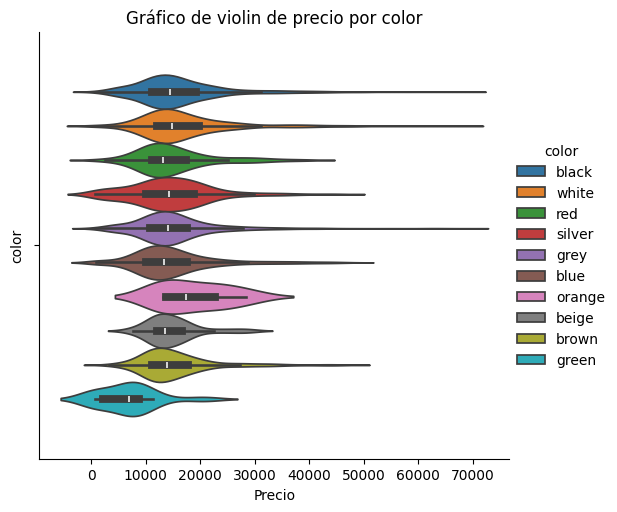

In [689]:
#veamos un gráfico de violin y despué de ver que los colores minoritarios tienen distribuciones diferentes en precio entre sí decido no borrar ninguno
sns.catplot(x = "precio", data= df_bmw2, kind="violin", hue="color")
plt.xlabel('Precio')
plt.ylabel('color')
plt.title('Gráfico de violin de precio por color')
plt.show()

In [690]:
#la distribución es demasiado diferente, no vamos a tocar el color

In [691]:
df_bmw2["tipo_coche"].value_counts()

estate         2334
suv            1051
hatchback       852
sedan           418
coupe            72
van              34
convertible      23
Name: tipo_coche, dtype: int64

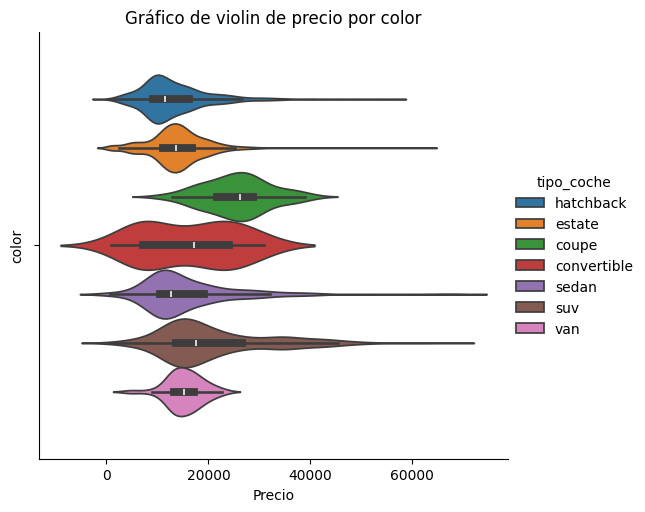

In [692]:
#veamos un gráfico de violin y despué de ver que los tipos de coche minoritarios tienen distribuciones diferentes en precio entre sí
sns.catplot(x = "precio", data= df_bmw2, kind="violin", hue="tipo_coche")
plt.xlabel('Precio')
plt.ylabel('color')
plt.title('Gráfico de violin de precio por color')
plt.show()

In [693]:
#demasiado diferentes, no los vamos a eliminar

In [694]:
#Modelos
lista_eliminar_modelos = obten_lista_eliminar(df_bmw2, "modelo", 20)
lista_eliminar_modelos

['325',
 '740',
 '530 Gran Turismo',
 '640 Gran Coupé',
 'X5 M',
 '114',
 '218 Active Tourer',
 'M550',
 '218',
 '218 Gran Tourer',
 '640',
 '418 Gran Coupé',
 'X6 M',
 '335',
 'Z4',
 '435 Gran Coupé',
 '528',
 '125',
 '328',
 '135',
 '430 Gran Coupé',
 '216 Gran Tourer',
 '523',
 '325 Gran Turismo',
 '435',
 'X5 M50',
 '330 Gran Turismo',
 '220',
 '335 Gran Turismo',
 '216 Active Tourer',
 'M235',
 '430',
 '650',
 '535 Gran Turismo',
 '425',
 '750',
 '123',
 '225',
 '735',
 'M3',
 'M135',
 '216',
 '220 Active Tourer',
 '630',
 '635',
 ' Active Tourer',
 '225 Active Tourer',
 '214 Gran Tourer']

In [695]:
#eliminamos os modelos que no tengan más de 20 existencias para hacer má manejable el dataset final considerando que 20 existencias son pocas para pedecir de forma correcta
eliminar_lista_df(df_bmw2,"modelo",lista_eliminar_modelos)

In [696]:
df_bmw2["modelo"].value_counts()

320                 746
520                 628
318                 563
X3                  435
116                 357
X1                  273
316                 232
X5                  229
525                 179
530                 157
118                 142
318 Gran Turismo     97
320 Gran Turismo     73
518                  66
535                  46
X4                   45
420                  43
X6                   43
120                  36
330                  33
420 Gran Coupé       33
730                  33
520 Gran Turismo     23
Name: modelo, dtype: int64

In [697]:
#función substituir valores equivalentes NO USADA
def sustituir_valores(dataset,lista,columna,valor):
  lista_sustituidos=[]
  for i in range(len(dataset)):
    if df_bmw2.loc[i,columna] in lista:
        df_bmw2.loc[i,columna]=valor
        lista_sustituidos
  return lista_sustituidos

# **NULOS**

In [698]:
#miramos nulos
df_bmw2.isnull().sum()

modelo                            3
km                                0
potencia                          0
fecha_registro                 2259
tipo_gasolina                     4
color                           417
volante_regulable                 4
aire_acondicionado              445
camara_trasera                    2
asientos_traseros_plegables    3175
elevalunas_electrico              1
bluetooth                       676
gps                               0
alerta_lim_velocidad            679
precio                            0
fecha_venta                       1
tipo_coche                        3
dtype: int64

In [699]:
#Borramos la fecha de registro ya que consideramos que no va a ser importante para el cálculo del precio
del df_bmw2['fecha_registro']

In [700]:
df_bmw2.shape

(4515, 16)

In [701]:
# al tener 4666 registros consideramos que se pueden borrar los registros que tengan menos de un 5% (25 registros) a nulo
columnas=df_bmw2.columns.tolist()
columnas_nulas=[]
for columna in columnas:
  if df_bmw2[columna].isnull().sum() < 25 and df_bmw2[columna].isnull().sum() != 0:
    columnas_nulas.append(columna)
    df_bmw2.dropna(subset=[columna], inplace=True)

In [702]:
df_bmw2.isnull().sum()

modelo                            0
km                                0
potencia                          0
tipo_gasolina                     0
color                           416
volante_regulable                 0
aire_acondicionado              443
camara_trasera                    0
asientos_traseros_plegables    3163
elevalunas_electrico              0
bluetooth                       673
gps                               0
alerta_lim_velocidad            676
precio                            0
fecha_venta                       0
tipo_coche                        0
dtype: int64

In [703]:
#Vemos que valores tienen las categógicas nulas
columnas=df_bmw2.columns.tolist()
columnas_nulas=[]
for columna in columnas:
  if df_bmw2[columna].isnull().sum() > 0:
    columnas_nulas.append(columna)
    print(df_bmw2[columna].unique())
columnas_nulas

['black' 'white' 'red' 'blue' nan 'grey' 'beige' 'silver' 'brown' 'green'
 'orange']
[True False nan]
[nan False True]
[nan False True]
[nan False True]


['color',
 'aire_acondicionado',
 'asientos_traseros_plegables',
 'bluetooth',
 'alerta_lim_velocidad']

In [704]:
#copiamos dataframe:
df_bmw3 = df_bmw2.copy()

In [705]:
df_bmw3_color=df_bmw3.copy()

In [706]:
df_bmw3_color['color'].fillna('Desconocido', inplace=True)

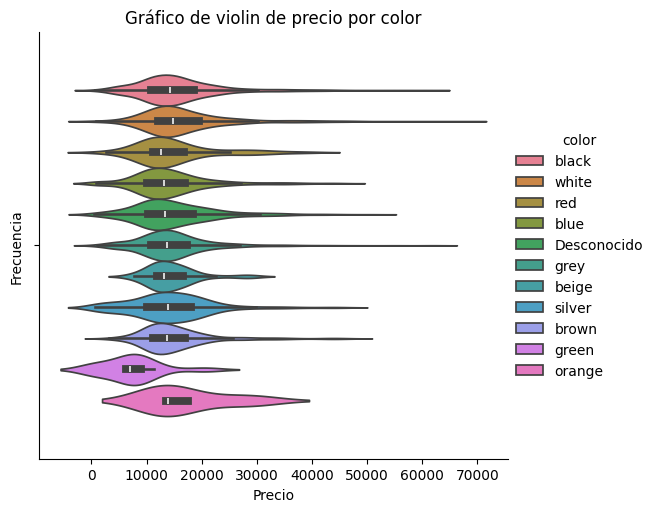

In [707]:
#Mramos si el precio depende del color, y vemos que en el grueso de vehículos no pasa
#decicimos poner una nueva categoria
sns.catplot(x = "precio", data= df_bmw3_color, kind="violin", hue="color")
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Gráfico de violin de precio por color')
plt.show()

In [708]:
 #Es muy parecido el violin al color black, lo ponemos en ese color
df_bmw3.fillna({'color':'black'}, inplace=True)

In [709]:
del df_bmw3_color

In [710]:
#Volvemos a hace la lista de categóricas nulas
columnas=df_bmw3.columns.tolist()
columnas_nulas=[]
for columna in columnas:
  if df_bmw3[columna].isnull().sum() > 0:
    columnas_nulas.append(columna)
    print(df_bmw3[columna].unique())
columnas_nulas

[True False nan]
[nan False True]
[nan False True]
[nan False True]


['aire_acondicionado',
 'asientos_traseros_plegables',
 'bluetooth',
 'alerta_lim_velocidad']

In [711]:
#volvemos a hacer recuento
df_bmw3.isnull().sum()

modelo                            0
km                                0
potencia                          0
tipo_gasolina                     0
color                             0
volante_regulable                 0
aire_acondicionado              443
camara_trasera                    0
asientos_traseros_plegables    3163
elevalunas_electrico              0
bluetooth                       673
gps                               0
alerta_lim_velocidad            676
precio                            0
fecha_venta                       0
tipo_coche                        0
dtype: int64

In [712]:
df_bmw3['modelo'].unique()

array(['118', '320', '420', '120', '318', '330', '316', '520', '525',
       '530', '535', '320 Gran Turismo', '518', '116', 'X3',
       '318 Gran Turismo', '420 Gran Coupé', '520 Gran Turismo', '730',
       'X5', 'X1', 'X4', 'X6'], dtype=object)

In [713]:
#Miramos el aire acondicionado, intuimos que puede depender del modelo de coche que tenga aire acondicionado , vamos a pasar de valores booleanos a numéricos #dataset sin nulos
df_bmw3_ac_nonulos=df_bmw3.loc[df_bmw3["aire_acondicionado"].notnull()]
df_bmw3_ac_nulos=df_bmw3.loc[df_bmw3["aire_acondicionado"].isnull()]
df_bmw3_ac_nonulos["aireacondicionado_int"]=0
df_bmw3_ac_nonulos = df_bmw3_ac_nonulos.reset_index(drop=True)
for i in range(len(df_bmw3_ac_nonulos)):
  df_bmw3_ac_nonulos.loc[i,"aireacondicionado_int"]=int(df_bmw3_ac_nonulos.loc[i,"aire_acondicionado"])
df_bmw3_ac_nulos = df_bmw3_ac_nulos.reset_index(drop=True)
df_bmw3_ac_nulos["aireacondicionado_int"]=2
df_bmw4 = pd.concat([df_bmw3_ac_nonulos,df_bmw3_ac_nulos],axis=0)

<ipython-input-713-2db32ad556ba>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bmw3_ac_nonulos["aireacondicionado_int"]=0


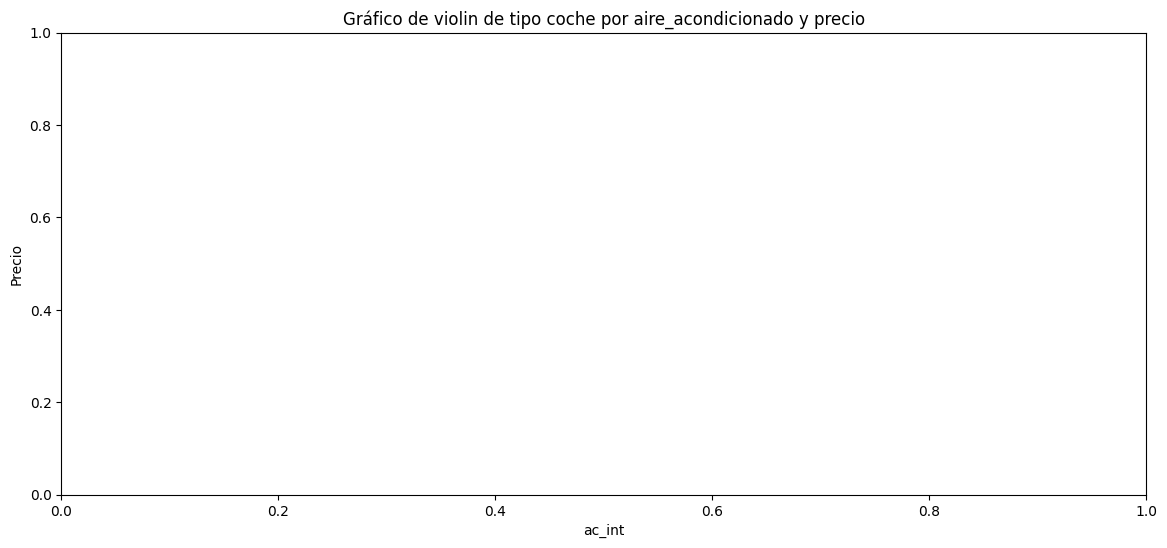

In [714]:
#intentamos ver si hay alguna correlación entre modelo y aire acondiononado pero no hay una relación clara
plt.figure(figsize=(14, 6))
plt.xlabel('ac_int')
plt.ylabel('Precio')
plt.title('Gráfico de violin de tipo coche por aire_acondicionado y precio')
plt.show()


In [715]:
#CONCLUSION, no se ve nada #Vamos a calcular la moda de cada uno de los tipos de coche y asignaremos a esos tipos el valor dependiendo de ella, vemos que solo un tipo de modelo suele no llevar AC
moda_ac_por_modelo = df_bmw3_ac_nonulos.groupby('modelo')['aire_acondicionado'].apply(lambda x: x.mode()[0])
moda_ac_por_modelo

modelo
116                 True
118                 True
120                 True
316                 True
318                 True
318 Gran Turismo    True
320                 True
320 Gran Turismo    True
330                 True
420                 True
420 Gran Coupé      True
518                 True
520                 True
520 Gran Turismo    True
525                 True
530                 True
535                 True
730                 True
X1                  True
X3                  True
X4                  True
X5                  True
X6                  True
Name: aire_acondicionado, dtype: bool

In [716]:
#sacamos la lista de aquellos que son false
df_moda_ac_por_modelo=pd.DataFrame(moda_ac_por_modelo)
moda_ac_por_modelo_false=df_moda_ac_por_modelo[df_moda_ac_por_modelo['aire_acondicionado']==False]
moda_ac_por_modelo_false.reset_index(inplace=True)
moda_ac_por_modelo_false

,modelo,aire_acondicionado


In [717]:
#descubrimos que la moda en todos los tipos de coche es que lleven aire acondicionado ponemos todos los valores nulos a 1
def ac_change(row):
    for i in range(len(moda_ac_por_modelo_false)):
      if row['modelo'] == moda_ac_por_modelo_false.loc[i,'modelo']:
        return 0
    return 1

df_bmw3_ac_nulos['aireacondicionado_int'] = df_bmw3_ac_nulos.apply(ac_change, axis=1)
df_bmw4 = pd.concat([df_bmw3_ac_nonulos,df_bmw3_ac_nulos],axis=0)

In [718]:
df_bmw4.isnull().sum()

modelo                            0
km                                0
potencia                          0
tipo_gasolina                     0
color                             0
volante_regulable                 0
aire_acondicionado              443
camara_trasera                    0
asientos_traseros_plegables    3163
elevalunas_electrico              0
bluetooth                       673
gps                               0
alerta_lim_velocidad            676
precio                            0
fecha_venta                       0
tipo_coche                        0
aireacondicionado_int             0
dtype: int64

In [719]:
#borramos campo aire_acondicionado y los df auxiliares
del df_bmw4['aire_acondicionado']

In [720]:
#Vamos a hacer lo mismo con los asientos_traseros_plegables
df_bmw4_atp_nonulos=df_bmw4.loc[df_bmw4["asientos_traseros_plegables"].notnull()]
df_bmw4_atp_nulos=df_bmw4.loc[df_bmw4["asientos_traseros_plegables"].isnull()]
df_bmw4_atp_nonulos["asientos_traseros_plegables_int"]=0
df_bmw4_atp_nonulos = df_bmw4_atp_nonulos.reset_index(drop=True)
for i in range(len(df_bmw4_atp_nonulos)):
  df_bmw4_atp_nonulos.loc[i,"asientos_traseros_plegables_int"]=int(df_bmw4_atp_nonulos.loc[i,"asientos_traseros_plegables"])
df_bmw4_atp_nulos = df_bmw4_atp_nulos.reset_index(drop=True)
df_bmw4_atp_nulos["asientos_traseros_plegables_int"]=2
df_bmw5 = pd.concat([df_bmw4_atp_nonulos,df_bmw4_atp_nulos],axis=0)

<ipython-input-720-7c7d1b7a854b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bmw4_atp_nonulos["asientos_traseros_plegables_int"]=0


In [721]:
#Vamos a calcular la moda de cada uno de los modelos y asignaremos a esos tipos el valor dependiendo de ella.
moda_atp_por_modelo = df_bmw4_atp_nonulos.groupby('modelo')['asientos_traseros_plegables'].apply(lambda x: x.mode()[0])
moda_atp_por_modelo

modelo
116                 False
118                 False
120                 False
316                 False
318                 False
318 Gran Turismo    False
320                 False
320 Gran Turismo    False
330                 False
420                 False
420 Gran Coupé      False
518                 False
520                 False
520 Gran Turismo    False
525                 False
530                 False
535                  True
730                 False
X1                  False
X3                   True
X4                   True
X5                   True
X6                   True
Name: asientos_traseros_plegables, dtype: bool

In [722]:
#sacamos la lista de aquellos que son false
df_moda_atp_por_modelo=pd.DataFrame(moda_atp_por_modelo)
moda_atp_por_modelo_false=df_moda_atp_por_modelo[df_moda_atp_por_modelo['asientos_traseros_plegables']==False]
moda_atp_por_modelo_false.reset_index(inplace=True)
moda_atp_por_modelo_false

,modelo,asientos_traseros_plegables
0,116,False
1,118,False
2,120,False
3,316,False
4,318,False
5,318 Gran Turismo,False
6,320,False
7,320 Gran Turismo,False
8,330,False
9,420,False


In [723]:
#descubrimos que la moda en todos los tipos de coche es que lleven aire acondicionado ponemos todos los valores nulos a 1
def atp_change(row):
    for i in range(len(moda_atp_por_modelo_false)):
      if row['modelo'] == moda_atp_por_modelo_false.loc[i,'modelo']:
        return 0
    return 1
df_bmw4_atp_nulos['asientos_traseros_plegables_int'] = df_bmw4_atp_nulos.apply(atp_change, axis=1)
df_bmw5 = pd.concat([df_bmw4_atp_nonulos,df_bmw4_atp_nulos],axis=0)

In [724]:
#borramos campo asientos_traseros_plegables y df axiliares
del df_bmw5['asientos_traseros_plegables']

In [725]:
#volvemos a hacer recuento
df_bmw5.isnull().sum()

modelo                               0
km                                   0
potencia                             0
tipo_gasolina                        0
color                                0
volante_regulable                    0
camara_trasera                       0
elevalunas_electrico                 0
bluetooth                          673
gps                                  0
alerta_lim_velocidad               676
precio                               0
fecha_venta                          0
tipo_coche                           0
aireacondicionado_int                0
asientos_traseros_plegables_int      0
dtype: int64

In [726]:
#Mismo proceso bluetooth
df_bmw5_bt_nonulos=df_bmw5.loc[df_bmw5["bluetooth"].notnull()]
df_bmw5_bt_nulos=df_bmw5.loc[df_bmw5["bluetooth"].isnull()]
df_bmw5_bt_nonulos["bluetooth_int"]=0
df_bmw5_bt_nonulos
df_bmw5_bt_nonulos = df_bmw5_bt_nonulos.reset_index(drop=True)
for i in range(len(df_bmw5_bt_nonulos)):
  df_bmw5_bt_nonulos.loc[i,"bluetooth_int"]=int(df_bmw5_bt_nonulos.loc[i,"bluetooth"])
df_bmw5_bt_nulos = df_bmw5_bt_nulos.reset_index(drop=True)

<ipython-input-726-db432e66f12d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bmw5_bt_nonulos["bluetooth_int"]=0


In [727]:
#El bluetooth lo vamos a hacer por modelo
moda_bt_por_modelo = df_bmw5_bt_nonulos.groupby('modelo')['bluetooth'].apply(lambda x: x.mode()[0])
moda_bt_por_modelo

modelo
116                 False
118                 False
120                 False
316                 False
318                 False
318 Gran Turismo    False
320                 False
320 Gran Turismo    False
330                 False
420                  True
420 Gran Coupé      False
518                 False
520                 False
520 Gran Turismo    False
525                 False
530                 False
535                  True
730                 False
X1                  False
X3                  False
X4                  False
X5                  False
X6                  False
Name: bluetooth, dtype: bool

In [728]:
#sacamos un df de aquellos que son false
moda_bt_por_modelo=pd.DataFrame(moda_bt_por_modelo)
moda_bt_por_modelo_false=moda_bt_por_modelo[moda_bt_por_modelo['bluetooth']==False]
moda_bt_por_modelo_false.reset_index(inplace=True)
moda_bt_por_modelo_false

,modelo,bluetooth
0,116,False
1,118,False
2,120,False
3,316,False
4,318,False
5,318 Gran Turismo,False
6,320,False
7,320 Gran Turismo,False
8,330,False
9,420 Gran Coupé,False


In [729]:
def bt_change(row):
    for i in range(len(moda_bt_por_modelo_false)):
      if row['modelo'] == moda_bt_por_modelo_false.loc[i,'modelo']:
        return 0
    return 1

df_bmw5_bt_nulos['bluetooth_int'] = df_bmw5_bt_nulos.apply(bt_change, axis=1)
df_bmw6 = pd.concat([df_bmw5_bt_nonulos,df_bmw5_bt_nulos],axis=0)

In [730]:
#borramos campo bluetooth y df axiliares
del df_bmw6['bluetooth']

In [731]:
#volvemos a hacer recuento
df_bmw6.isnull().sum()

modelo                               0
km                                   0
potencia                             0
tipo_gasolina                        0
color                                0
volante_regulable                    0
camara_trasera                       0
elevalunas_electrico                 0
gps                                  0
alerta_lim_velocidad               676
precio                               0
fecha_venta                          0
tipo_coche                           0
aireacondicionado_int                0
asientos_traseros_plegables_int      0
bluetooth_int                        0
dtype: int64

In [732]:
#Alerta límite e velocidad por modelo
df_bmw6_alv_nonulos=df_bmw6.loc[df_bmw6["alerta_lim_velocidad"].notnull()]
df_bmw6_alv_nulos=df_bmw6.loc[df_bmw6["alerta_lim_velocidad"].isnull()]
df_bmw6_alv_nonulos["alerta_lim_velocidad_int"]=0
df_bmw6_alv_nonulos = df_bmw6_alv_nonulos.reset_index(drop=True)
for i in range(len(df_bmw6_alv_nonulos)):
  df_bmw6_alv_nonulos.loc[i,"alerta_lim_velocidad_int"]=int(df_bmw6_alv_nonulos.loc[i,"alerta_lim_velocidad"])
df_bmw6_alv_nulos = df_bmw6_alv_nulos.reset_index(drop=True)

<ipython-input-732-8d8e49745a85>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bmw6_alv_nonulos["alerta_lim_velocidad_int"]=0


In [733]:
#moda por modelo de alerta limite velocidad
moda_alv_por_modelo = df_bmw6_alv_nonulos.groupby('modelo')['alerta_lim_velocidad'].apply(lambda x: x.mode()[0])
#sacamos una lista con los modelos cuya moda es que llevan bluetooth
moda_alv_por_modelo=pd.DataFrame(moda_alv_por_modelo)
moda_alv_por_modelo_false=moda_alv_por_modelo[moda_alv_por_modelo['alerta_lim_velocidad']==False]
moda_alv_por_modelo_false.reset_index(inplace=True)
moda_alv_por_modelo_false

,modelo,alerta_lim_velocidad
0,116,False
1,118,False
2,120,False
3,316,False
4,318,False
5,318 Gran Turismo,False
6,X1,False


In [734]:
def alv_change(row):
    for i in range(len(moda_alv_por_modelo_false)):
      if row['modelo'] == moda_alv_por_modelo_false.loc[i,'modelo']:
        return 0
    return 1

df_bmw6_alv_nulos['alerta_lim_velocidad_int'] = df_bmw6_alv_nulos.apply(alv_change, axis=1)
df_bmw7 = pd.concat([df_bmw6_alv_nonulos,df_bmw6_alv_nulos],axis=0)

In [735]:
#borramos campo bluetooth y df axiliares
del df_bmw7['alerta_lim_velocidad']

In [736]:
df_bmw7.isnull().sum()

modelo                             0
km                                 0
potencia                           0
tipo_gasolina                      0
color                              0
volante_regulable                  0
camara_trasera                     0
elevalunas_electrico               0
gps                                0
precio                             0
fecha_venta                        0
tipo_coche                         0
aireacondicionado_int              0
asientos_traseros_plegables_int    0
bluetooth_int                      0
alerta_lim_velocidad_int           0
dtype: int64

In [737]:
df_bmw7 = df_bmw7.reset_index(drop=True)
df_bmw7

,modelo,km,potencia,tipo_gasolina,color,volante_regulable,camara_trasera,elevalunas_electrico,gps,precio,fecha_venta,tipo_coche,aireacondicionado_int,asientos_traseros_plegables_int,bluetooth_int,alerta_lim_velocidad_int
0,120,174631.0,120.0,diesel,black,True,False,False,True,10500.0,2018-04-01,hatchback,1,0,0,0
1,318,196092.0,85.0,petrol,black,True,False,False,False,1800.0,2018-05-01,estate,0,0,0,0
2,320,194192.0,120.0,diesel,beige,True,False,True,True,11800.0,2018-07-01,estate,1,0,0,0
3,120,223269.0,120.0,diesel,blue,True,False,False,True,8000.0,2018-08-01,hatchback,1,0,0,1
4,318,187104.0,105.0,petrol,red,True,False,False,True,2600.0,2018-08-01,estate,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,X5,205054.0,225.0,diesel,grey,True,False,True,True,18700.0,2018-06-01,suv,1,1,0,1
4496,X6,111290.0,225.0,diesel,white,True,True,True,True,36900.0,2018-06-01,suv,1,1,0,1
4497,X5,111962.0,190.0,diesel,black,True,False,True,True,26500.0,2018-09-01,suv,1,1,0,1
4498,520,195547.0,135.0,diesel,black,False,False,True,True,17300.0,2018-05-01,estate,1,0,0,1


In [738]:
#Tratamos resto de booleanos
df_bmw7["volante_regulable_int"]=0
df_bmw7["camara_trasera_int"]=0
df_bmw7["elevalunas_electrico_int"]=0
df_bmw7["gps_int"]=0
for i in range(len(df_bmw7)):
  df_bmw7.loc[i,"volante_regulable_int"]=int(df_bmw7.loc[i,"volante_regulable"])
  df_bmw7.loc[i,"camara_trasera_int"]=int(df_bmw7.loc[i,"camara_trasera"])
  df_bmw7.loc[i,"elevalunas_electrico_int"]=int(df_bmw7.loc[i,"elevalunas_electrico"])
  df_bmw7.loc[i,"gps_int"]=int(df_bmw7.loc[i,"gps"])
del df_bmw7['volante_regulable']
del df_bmw7['camara_trasera']
del df_bmw7['elevalunas_electrico']
del df_bmw7['gps']

In [739]:
df_bmw7.head()

,modelo,km,potencia,tipo_gasolina,color,precio,fecha_venta,tipo_coche,aireacondicionado_int,asientos_traseros_plegables_int,bluetooth_int,alerta_lim_velocidad_int,volante_regulable_int,camara_trasera_int,elevalunas_electrico_int,gps_int
0,120,174631.0,120.0,diesel,black,10500.0,2018-04-01,hatchback,1,0,0,0,1,0,0,1
1,318,196092.0,85.0,petrol,black,1800.0,2018-05-01,estate,0,0,0,0,1,0,0,0
2,320,194192.0,120.0,diesel,beige,11800.0,2018-07-01,estate,1,0,0,0,1,0,1,1
3,120,223269.0,120.0,diesel,blue,8000.0,2018-08-01,hatchback,1,0,0,1,1,0,0,1
4,318,187104.0,105.0,petrol,red,2600.0,2018-08-01,estate,0,0,1,0,1,0,0,1


# **Tratamiento de fechas**

In [740]:
df_bmw8 = df_bmw7.copy()


In [741]:
for col in ['fecha_venta']:
    df_bmw8[col + '_nombredia'] = df_bmw8[col].dt.day_name()
    #el dia siempre es 1 y el año siempre es 2018 es redundante
    df_bmw8[col + '_mes'] = df_bmw8[col].dt.month

In [742]:
del df_bmw8["fecha_venta"]

In [743]:
df_bmw8=df_bmw8.reset_index(drop=True)

In [744]:
df_bmw8.head()


,modelo,km,potencia,tipo_gasolina,color,precio,tipo_coche,aireacondicionado_int,asientos_traseros_plegables_int,bluetooth_int,alerta_lim_velocidad_int,volante_regulable_int,camara_trasera_int,elevalunas_electrico_int,gps_int,fecha_venta_nombredia,fecha_venta_mes
0,120,174631.0,120.0,diesel,black,10500.0,hatchback,1,0,0,0,1,0,0,1,Sunday,4
1,318,196092.0,85.0,petrol,black,1800.0,estate,0,0,0,0,1,0,0,0,Tuesday,5
2,320,194192.0,120.0,diesel,beige,11800.0,estate,1,0,0,0,1,0,1,1,Sunday,7
3,120,223269.0,120.0,diesel,blue,8000.0,hatchback,1,0,0,1,1,0,0,1,Wednesday,8
4,318,187104.0,105.0,petrol,red,2600.0,estate,0,0,1,0,1,0,0,1,Wednesday,8


# **#Correlación inicial**

In [745]:
corr_matrix=df_bmw8.corr()

<ipython-input-745-905a2634a358>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=df_bmw8.corr()


In [746]:
corr_matrix.style.background_gradient(cmap="coolwarm")

,km,potencia,precio,aireacondicionado_int,asientos_traseros_plegables_int,bluetooth_int,alerta_lim_velocidad_int,volante_regulable_int,camara_trasera_int,elevalunas_electrico_int,gps_int,fecha_venta_mes
km,1.000000,-0.008995,-0.426038,0.032463,-0.079998,-0.022548,-0.013918,0.079477,0.003528,0.045291,0.170605,-0.001658
potencia,-0.008995,1.000000,0.648152,0.187026,0.478213,0.177560,0.527038,0.313270,0.300667,0.364019,-0.004013,-0.020605
precio,-0.426038,0.648152,1.000000,0.241493,0.480304,0.192660,0.463001,0.270539,0.246619,0.314664,-0.002014,0.018952
aireacondicionado_int,0.032463,0.187026,0.241493,1.000000,0.092850,0.104979,0.197294,0.284947,0.139127,0.259390,0.350340,0.014207
asientos_traseros_plegables_int,-0.079998,0.478213,0.480304,0.092850,1.000000,0.099270,0.261880,0.195686,0.165561,0.152859,0.018667,0.087150
bluetooth_int,-0.022548,0.177560,0.192660,0.104979,0.099270,1.000000,0.086603,0.121220,0.116992,0.234993,0.115175,-0.015266
alerta_lim_velocidad_int,-0.013918,0.527038,0.463001,0.197294,0.261880,0.086603,1.000000,0.232587,0.182358,0.340469,-0.058221,-0.040766
volante_regulable_int,0.079477,0.313270,0.270539,0.284947,0.195686,0.121220,0.232587,1.000000,0.245609,0.272970,0.241784,0.089364
camara_trasera_int,0.003528,0.300667,0.246619,0.139127,0.165561,0.116992,0.182358,0.245609,1.000000,0.190099,0.064654,0.026296
elevalunas_electrico_int,0.045291,0.364019,0.314664,0.259390,0.152859,0.234993,0.340469,0.272970,0.190099,1.000000,0.197355,-0.023807


In [747]:
#No vemos grandes correlaciones entre las columans como para obviar alguna
df_bmw8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   modelo                           4500 non-null   object 
 1   km                               4500 non-null   float64
 2   potencia                         4500 non-null   float64
 3   tipo_gasolina                    4500 non-null   object 
 4   color                            4500 non-null   object 
 5   precio                           4500 non-null   float64
 6   tipo_coche                       4500 non-null   object 
 7   aireacondicionado_int            4500 non-null   int64  
 8   asientos_traseros_plegables_int  4500 non-null   int64  
 9   bluetooth_int                    4500 non-null   int64  
 10  alerta_lim_velocidad_int         4500 non-null   int64  
 11  volante_regulable_int            4500 non-null   int64  
 12  camara_trasera_int  

# **INSIGHTS**

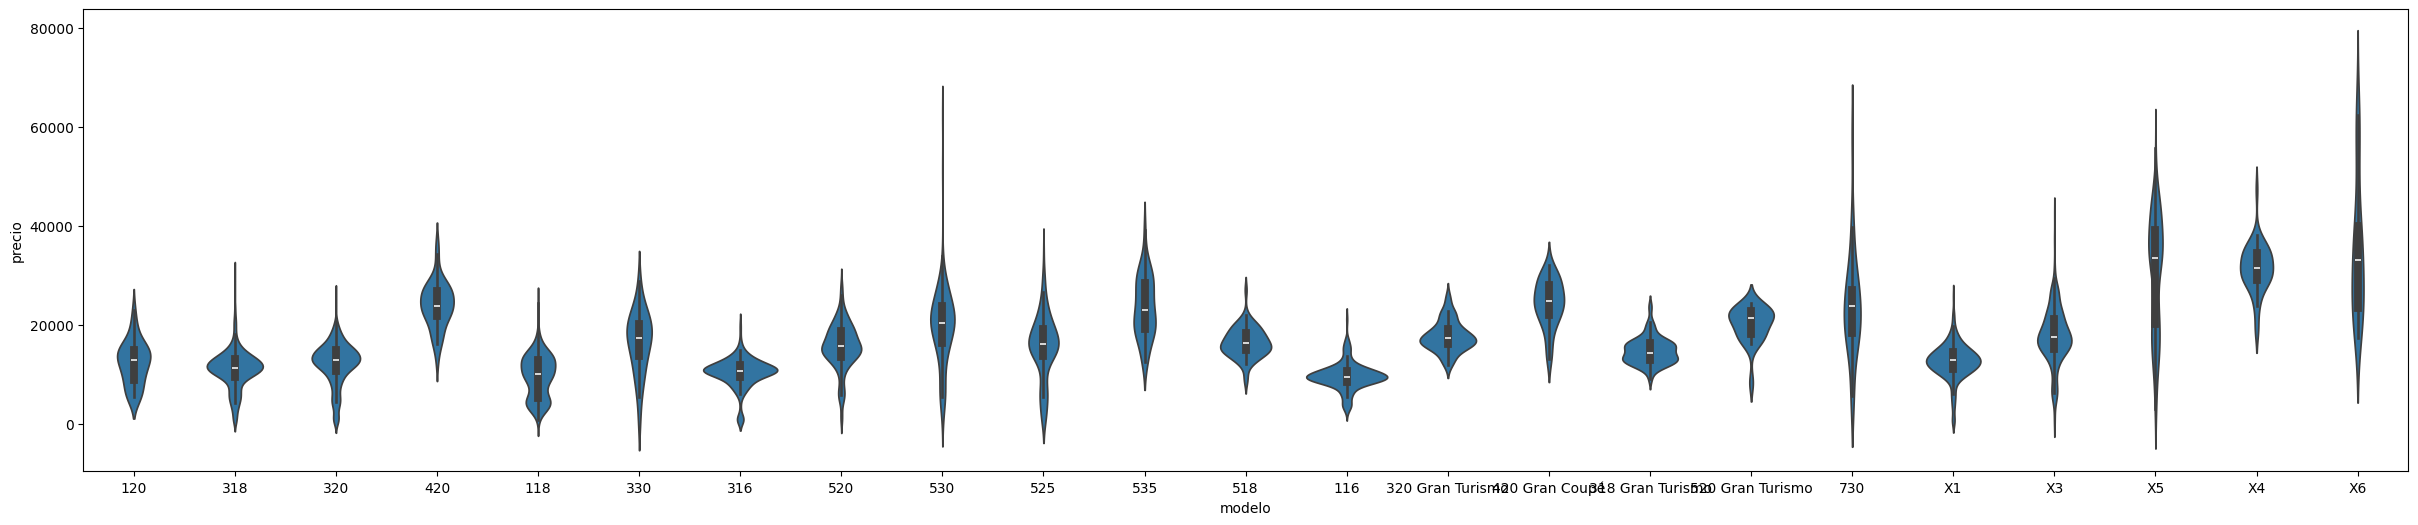

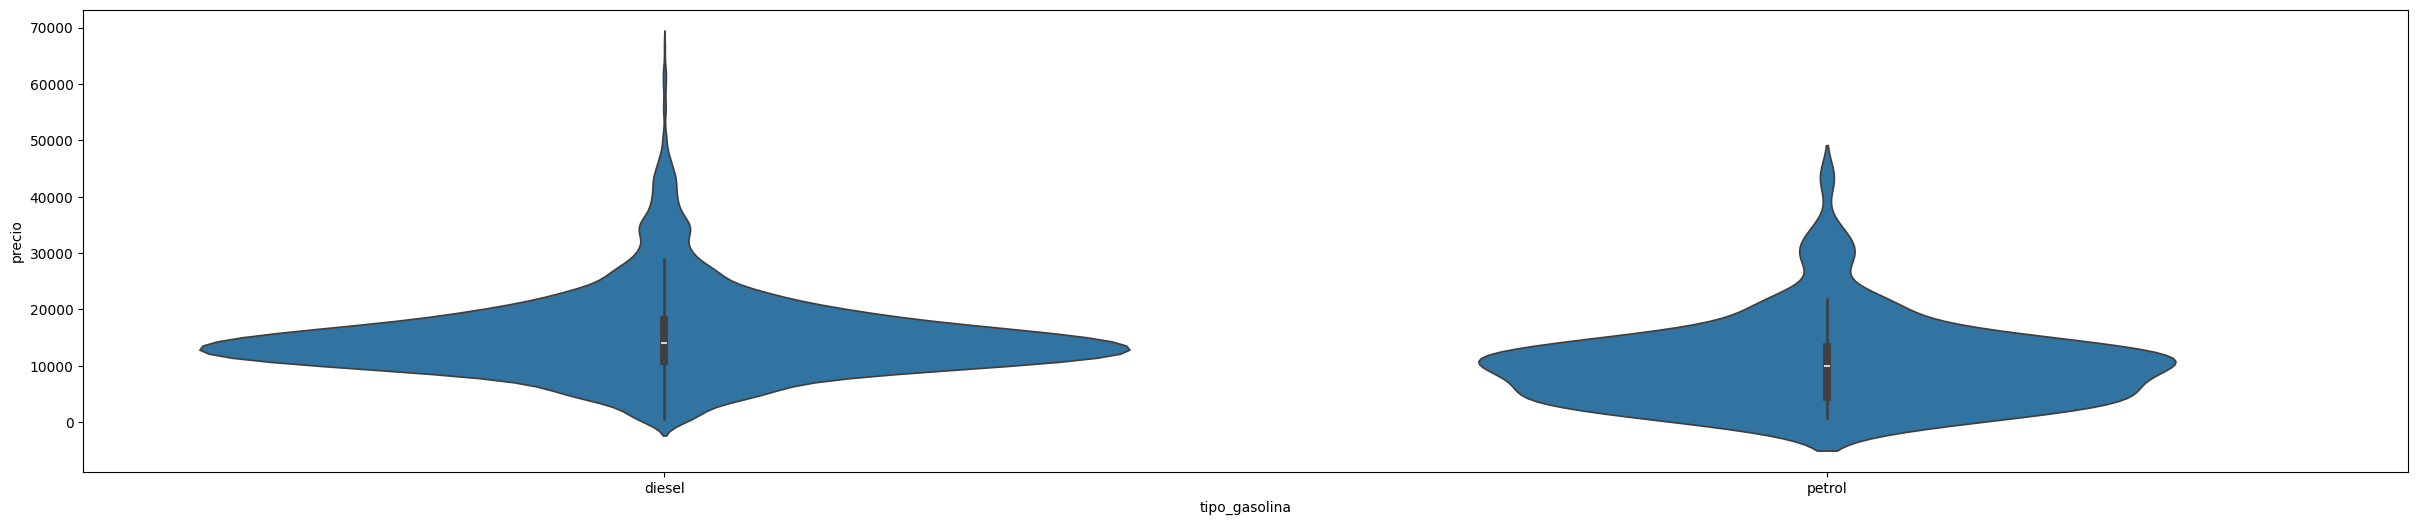

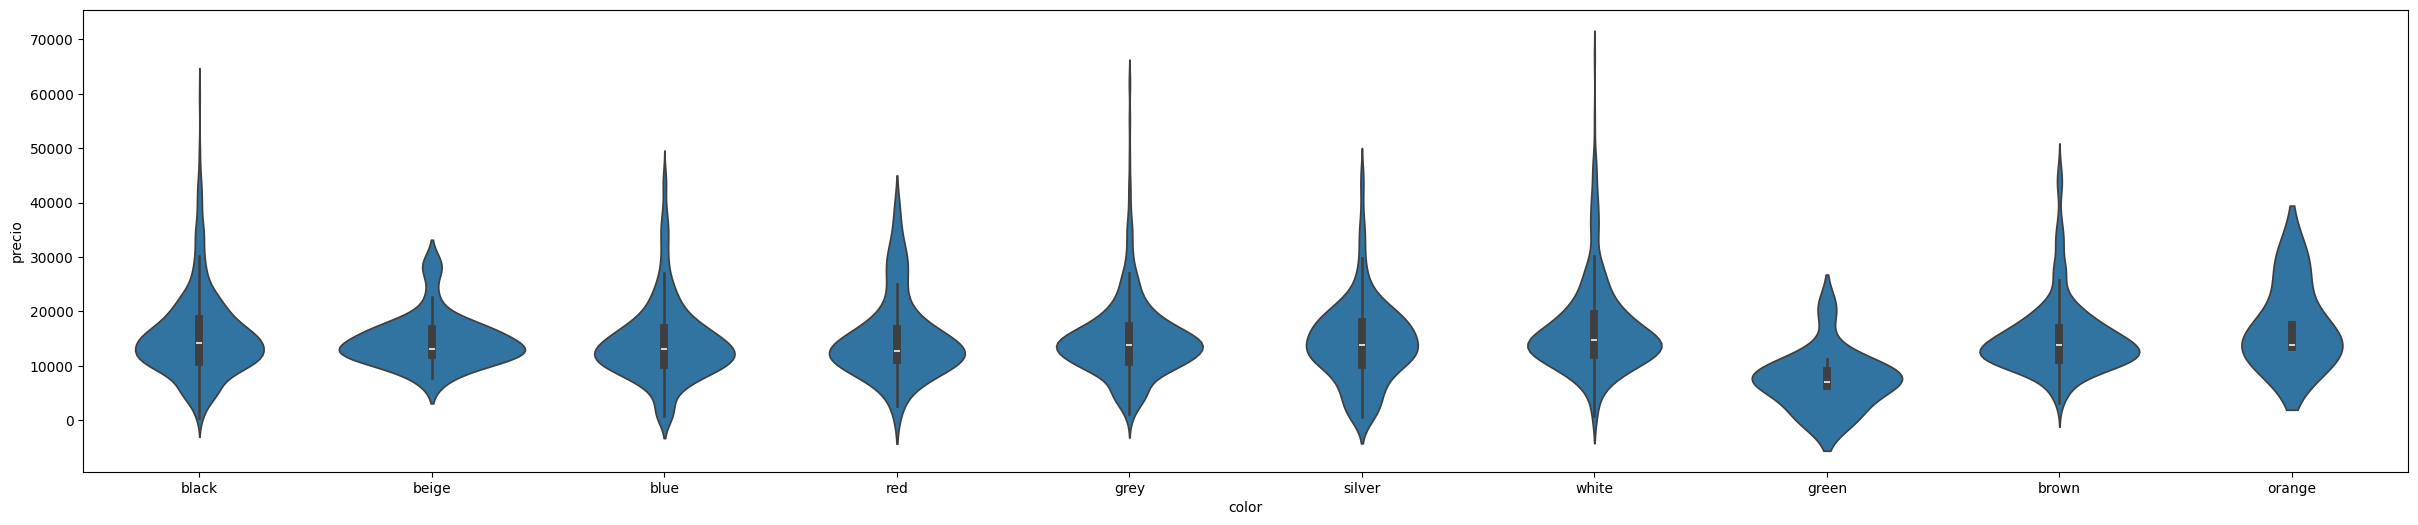

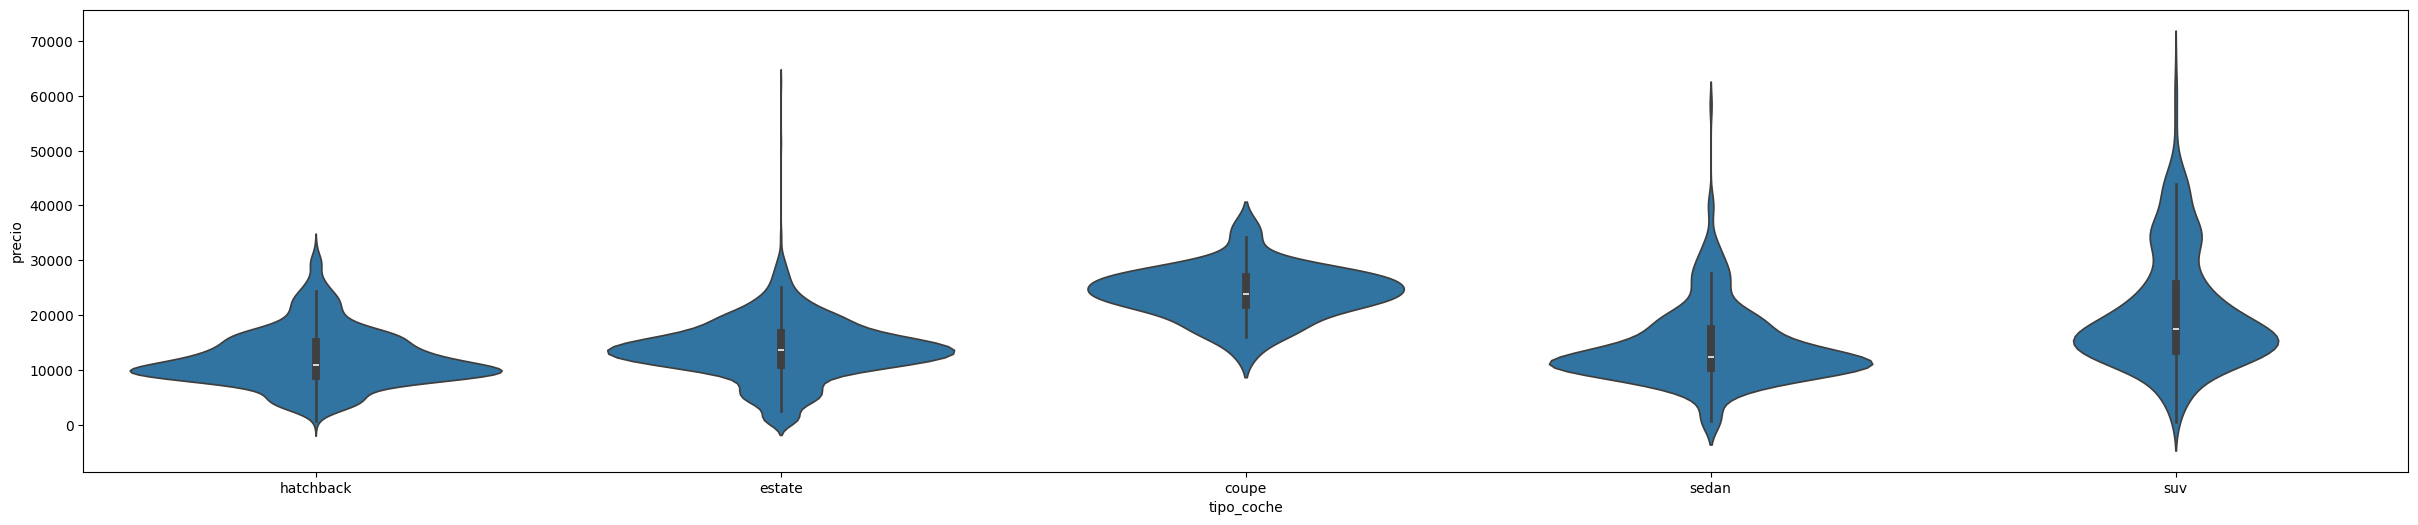

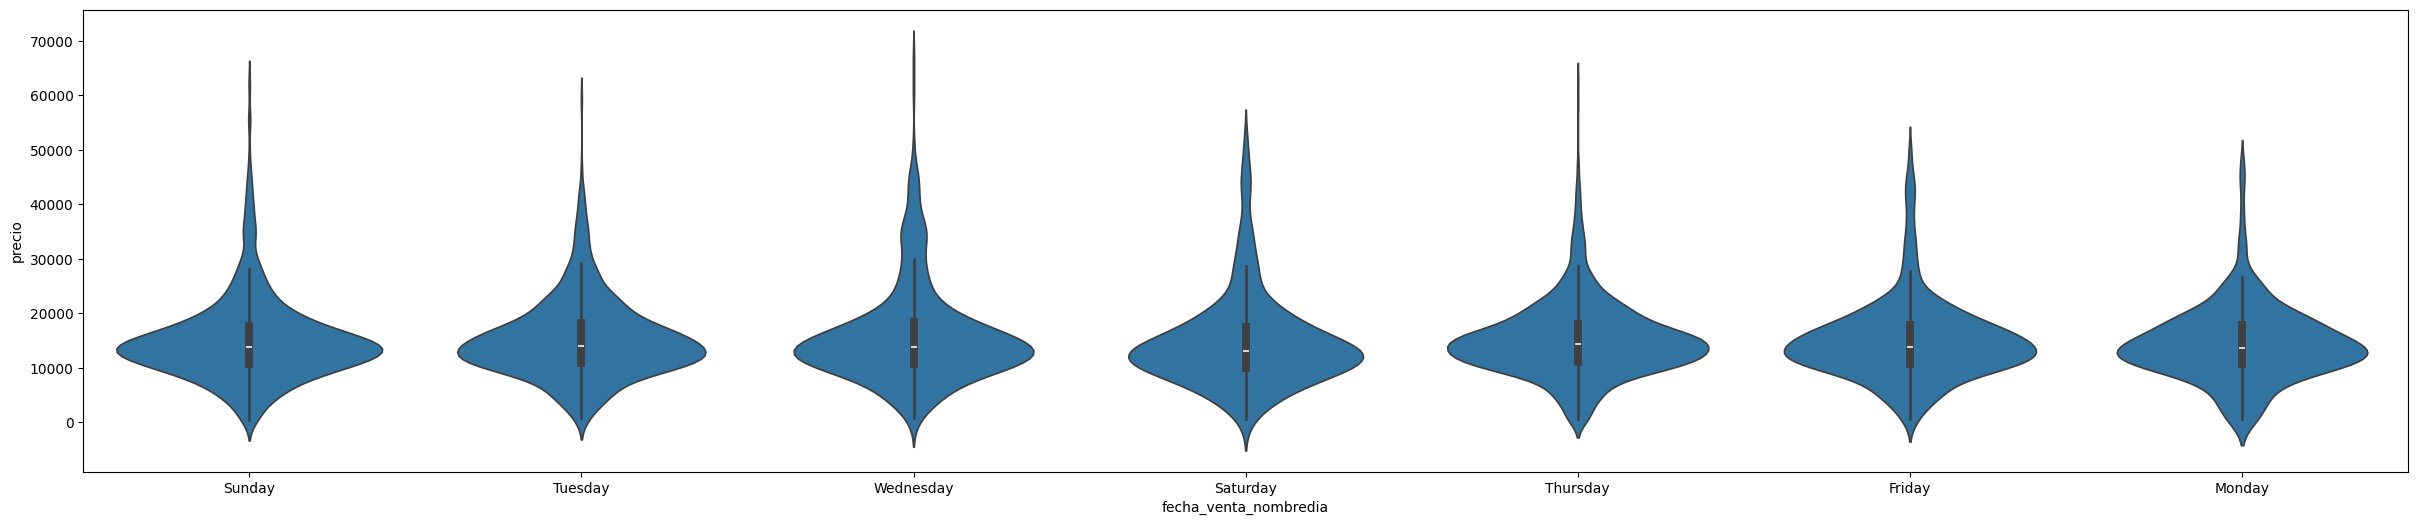

In [748]:
#Vamos a echarle un vestizo a las categorías de nuevo
for i in df_bmw8:
  if (df_bmw8[i].dtype.kind =="O"):
    plt.figure(figsize=(30, 6))
    sns.violinplot(x=i,y="precio", data=df_bmw8)

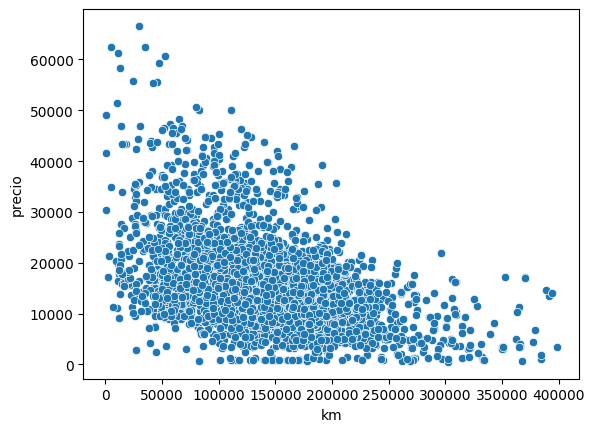

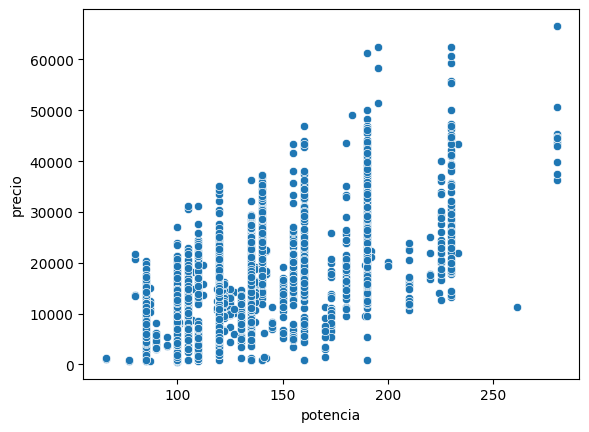

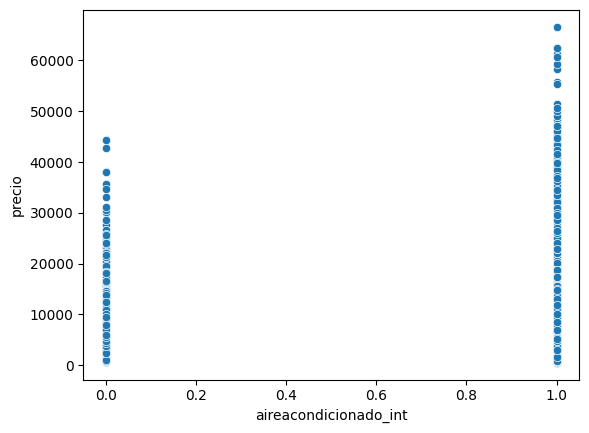

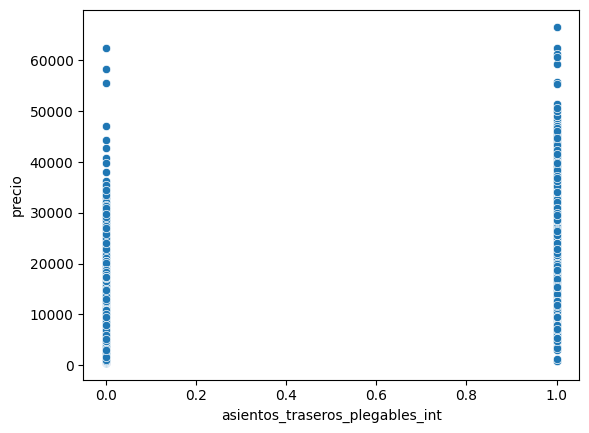

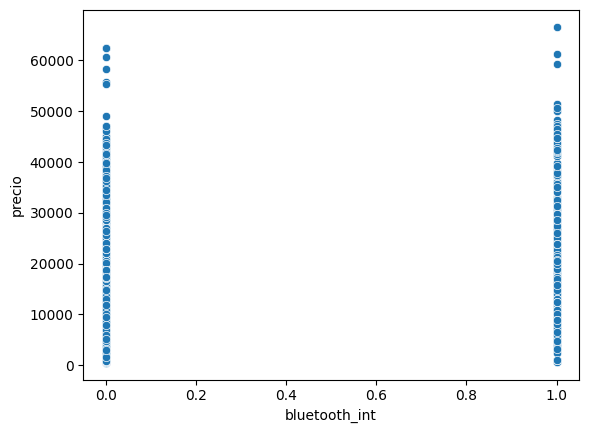

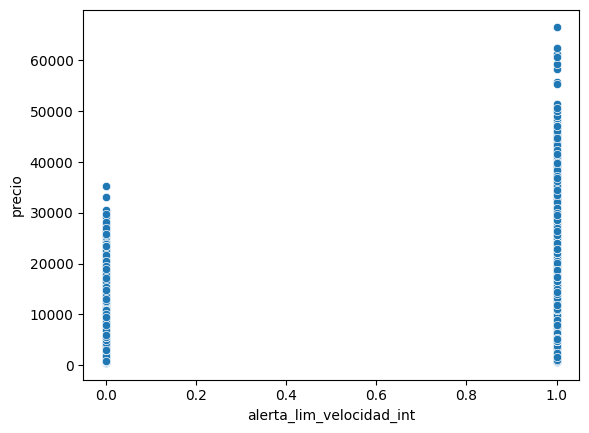

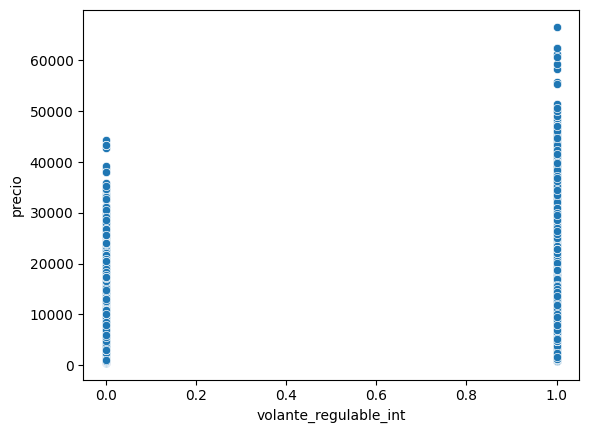

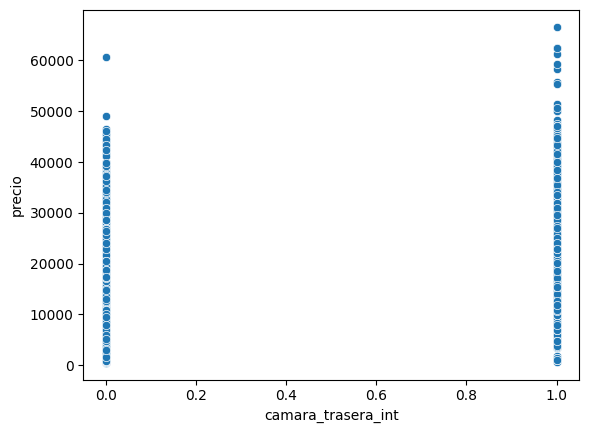

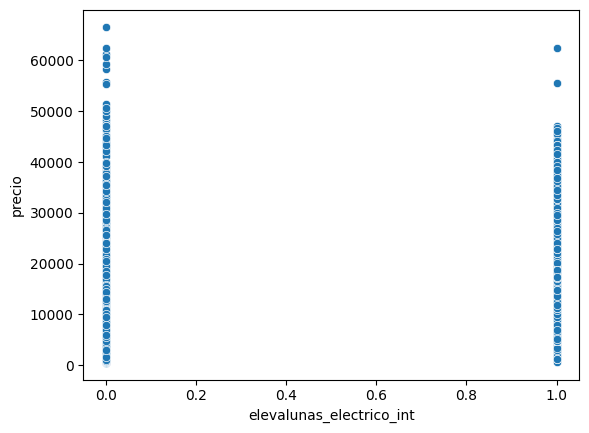

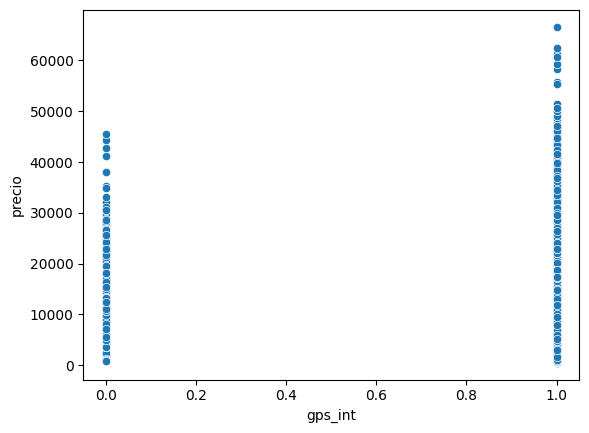

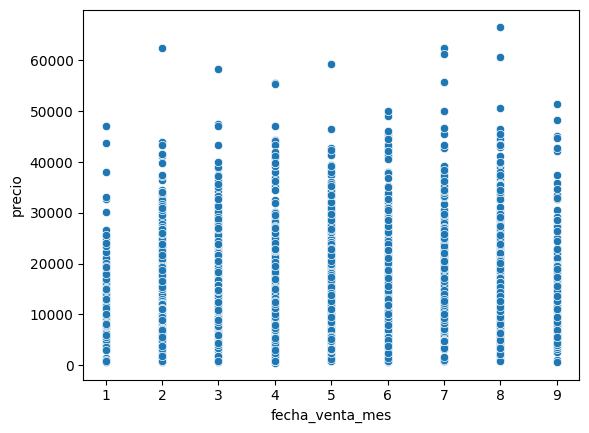

In [749]:
#Y otro vistazo a las numéricas
for i in df_bmw8:
  if (df_bmw8[i].dtype.kind in ("i","f")) and (i!="precio"):
    plt.figure()
    sns.scatterplot(x=i,y="precio", data=df_bmw8)

# **Tratamiento del target**

<ipython-input-750-9c3b320a011f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_bmw8['precio'])


<Axes: xlabel='precio', ylabel='Density'>

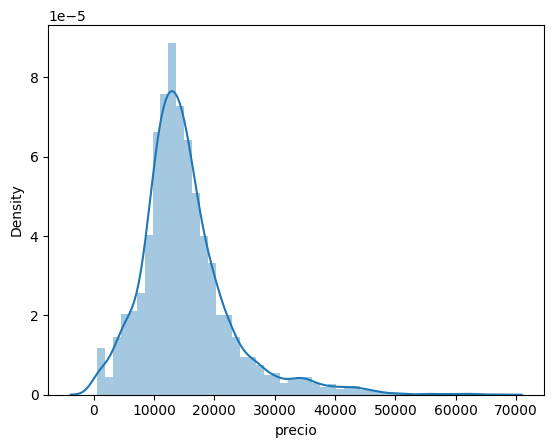

In [750]:
#verificamos histograma
sns.distplot(df_bmw8['precio'])

<Axes: xlabel='precio'>

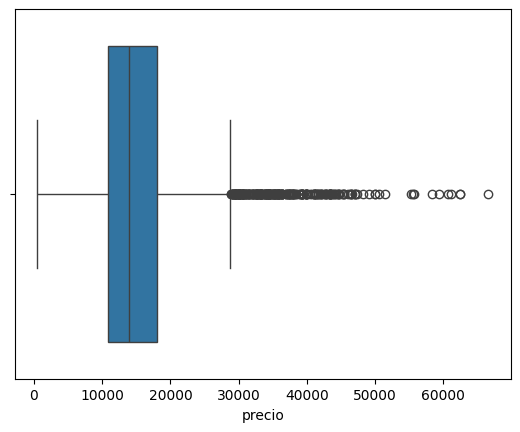

In [751]:
sns.boxplot(x=df_bmw8["precio"])

In [752]:
#Le aplicamos una escala logaritmica
df_bmw8["log_precio"]=np.log10(df_bmw8["precio"])

<ipython-input-753-5c9987fa2c97>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_bmw8['log_precio'])


<Axes: xlabel='log_precio', ylabel='Density'>

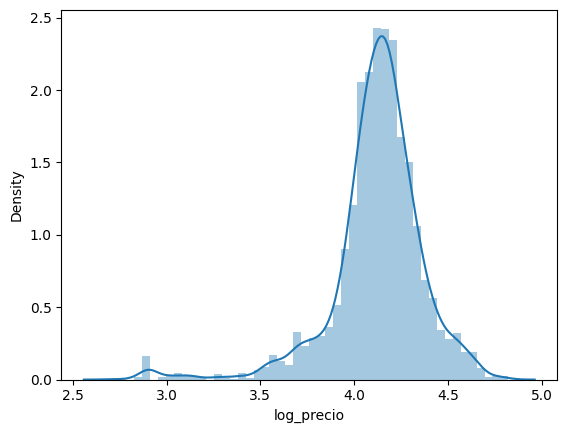

In [753]:
#verificamos histograma
sns.distplot(df_bmw8['log_precio'])

<Axes: xlabel='log_precio'>

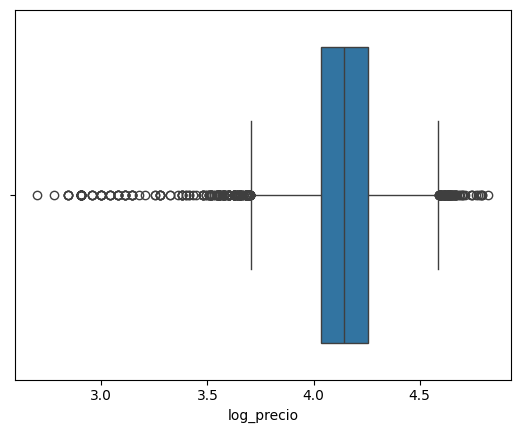

In [754]:
sns.boxplot(x=df_bmw8["log_precio"])

In [755]:
#le hemos dado la vuelta a la gráfica, dudo de que valga la pena este campo, lo veremos en la fase de modelo

#**ENCODING Y RESCALING**

In [756]:
target= ["precio","log_precio"]

In [757]:
def obtener_lista_variables(dataset):
    lista_numericas=[]
    lista_boolean=[]
    lista_categoricas=[]

    for i in dataset:
        if    (dataset[i].dtype.kind in ("f","i")) and len(dataset[i].unique())!= 2  and i not in target:
              lista_numericas.append(i)
        elif  (dataset[i].dtype.kind in ("f","i")) and len(dataset[i].unique())== 2  and i not in target:
              lista_boolean.append(i)
        elif  (dataset[i].dtype.kind == "O")  and i not in target:
              lista_categoricas.append(i)

    return lista_numericas, lista_boolean, lista_categoricas

In [758]:
lista_numericas, lista_boolean, lista_categoricas= obtener_lista_variables(df_bmw8)

In [759]:
lista_categoricas


['modelo', 'tipo_gasolina', 'color', 'tipo_coche', 'fecha_venta_nombredia']

In [760]:
# One Hot Encoding
df_bmw9=pd.get_dummies(data=df_bmw8, columns=lista_categoricas)

In [761]:
df_bmw9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 60 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   km                               4500 non-null   float64
 1   potencia                         4500 non-null   float64
 2   precio                           4500 non-null   float64
 3   aireacondicionado_int            4500 non-null   int64  
 4   asientos_traseros_plegables_int  4500 non-null   int64  
 5   bluetooth_int                    4500 non-null   int64  
 6   alerta_lim_velocidad_int         4500 non-null   int64  
 7   volante_regulable_int            4500 non-null   int64  
 8   camara_trasera_int               4500 non-null   int64  
 9   elevalunas_electrico_int         4500 non-null   int64  
 10  gps_int                          4500 non-null   int64  
 11  fecha_venta_mes                  4500 non-null   int64  
 12  log_precio          

In [762]:
lista_numericas

['km', 'potencia', 'fecha_venta_mes']

In [763]:
minmaxresultado = MinMaxScaler()

In [764]:
df_bmw9[lista_numericas] = minmaxresultado.fit_transform(df_bmw9[lista_numericas])
#ponderamos variables numéricas

In [765]:
df_bmw9.head()

,km,potencia,precio,aireacondicionado_int,asientos_traseros_plegables_int,bluetooth_int,alerta_lim_velocidad_int,volante_regulable_int,camara_trasera_int,elevalunas_electrico_int,...,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_suv,fecha_venta_nombredia_Friday,fecha_venta_nombredia_Monday,fecha_venta_nombredia_Saturday,fecha_venta_nombredia_Sunday,fecha_venta_nombredia_Thursday,fecha_venta_nombredia_Tuesday,fecha_venta_nombredia_Wednesday
0,0.438052,0.252336,10500.0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
1,0.492033,0.088785,1800.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0.487254,0.252336,11800.0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0.560391,0.252336,8000.0,1,0,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1
4,0.469425,0.182243,2600.0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


# **CORRELACIONES**

In [766]:
df_bmw9.shape

(4500, 60)

In [767]:
corr=df_bmw9.corr()

In [768]:
corr.style.background_gradient(cmap="coolwarm")

,km,potencia,precio,aireacondicionado_int,asientos_traseros_plegables_int,bluetooth_int,alerta_lim_velocidad_int,volante_regulable_int,camara_trasera_int,elevalunas_electrico_int,gps_int,fecha_venta_mes,log_precio,modelo_116,modelo_118,modelo_120,modelo_316,modelo_318,modelo_318 Gran Turismo,modelo_320,modelo_320 Gran Turismo,modelo_330,modelo_420,modelo_420 Gran Coupé,modelo_518,modelo_520,modelo_520 Gran Turismo,modelo_525,modelo_530,modelo_535,modelo_730,modelo_X1,modelo_X3,modelo_X4,modelo_X5,modelo_X6,tipo_gasolina_diesel,tipo_gasolina_petrol,color_beige,color_black,color_blue,color_brown,color_green,color_grey,color_orange,color_red,color_silver,color_white,tipo_coche_coupe,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_suv,fecha_venta_nombredia_Friday,fecha_venta_nombredia_Monday,fecha_venta_nombredia_Saturday,fecha_venta_nombredia_Sunday,fecha_venta_nombredia_Thursday,fecha_venta_nombredia_Tuesday,fecha_venta_nombredia_Wednesday
km,1.000000,-0.008995,-0.426038,0.032463,-0.079998,-0.022548,-0.013918,0.079477,0.003528,0.045291,0.170605,-0.001658,-0.431740,-0.128155,-0.037428,-0.013138,-0.006024,0.052890,0.003796,0.091899,-0.023695,-0.014274,-0.099000,-0.092552,0.029037,0.084193,-0.005413,0.092894,0.072704,0.026697,0.013255,-0.070936,-0.045696,-0.109469,-0.045076,-0.031568,-0.003190,0.003190,-0.010773,0.034308,-0.024282,-0.026259,0.030332,0.033001,-0.016869,-0.012912,0.022396,-0.067424,-0.099000,0.221948,-0.141584,0.021523,-0.129486,-0.002842,0.016972,0.001697,0.011821,-0.013453,-0.009130,0.003855
potencia,-0.008995,1.000000,0.648152,0.187026,0.478213,0.177560,0.527038,0.313270,0.300667,0.364019,-0.004013,-0.020605,0.508934,-0.353478,-0.119637,0.017616,-0.282177,-0.274110,-0.104645,0.005735,0.029418,0.154498,0.018444,0.019174,-0.082587,0.023096,0.001776,0.160712,0.343371,0.307955,0.132785,-0.116029,0.084193,0.085383,0.436129,0.249699,-0.003296,0.003296,-0.023567,0.044601,-0.020458,-0.054307,-0.014173,0.002131,0.006049,-0.017062,0.003532,0.003131,0.018444,0.054474,-0.332383,-0.109368,0.299993,-0.017587,-0.013201,-0.032196,0.008111,0.010260,0.007343,0.014692
precio,-0.426038,0.648152,1.000000,0.241493,0.480304,0.192660,0.463001,0.270539,0.246619,0.314664,-0.002014,0.018952,0.867643,-0.210268,-0.128715,-0.032426,-0.143436,-0.202297,-0.006614,-0.170142,0.042469,0.016458,0.112183,0.102992,0.020458,0.029780,0.046346,0.014503,0.114248,0.110099,0.095620,-0.082561,0.112458,0.212400,0.457231,0.249351,0.104330,-0.104330,-0.006273,0.031739,-0.045951,0.001340,-0.054440,-0.024598,0.008044,-0.001563,-0.031523,0.069342,0.112183,-0.188816,-0.175323,-0.036473,0.380069,-0.009357,-0.024190,-0.011190,-0.006459,-0.000466,0.005807,0.036124
aireacondicionado_int,0.032463,0.187026,0.241493,1.000000,0.092850,0.104979,0.197294,0.284947,0.139127,0.259390,0.350340,0.014207,0.306062,-0.159815,-0.104560,-0.041047,-0.035074,0.010182,0.030992,-0.043695,0.001961,-0.012959,-0.019515,0.020649,0.043623,0.141379,0.034036,0.052233,0.071533,0.047725,0.040814,-0.112356,-0.007685,0.018906,0.078641,0.040747,0.069972,-0.069972,0.008318,0.011216,0.004968,0.050238,-0.017182,0.021333,0.014164,-0.043372,-0.039924,-0.050182,-0.019515,0.116616,-0.149898,0.020750,-0.014221,0.008246,-0.012229,0.002481,-0.029326,0.006288,0.007848,0.020309
asientos_traseros_plegables_int,-0.079998,0.478213,0.480304,0.092850,1.000000,0.099270,0.261880,0.195686,0.165561,0.152859,0.018667,0.087150,0.360521,-0.138980,-0.085463,-0.029618,-0.110133,-0.174827,-0.070273,-0.171858,-0.033508,-0.040693,-0.039979,-0.020490,-0.057763,-0.173904,-0.033935,-0.057760,-0.024262,0.183405,-0.027225,-0.076996,0.601495,0.189180,0.444631,0.183837,0.036076,-0.036076,-0.001498,0.010566,-0.034681,-0.010012,0.028044,-0.032599,0.005159,0.019775,0.052697,0.022165,-0.039979,-0.401839,-0.196734,-0.055437,0.700498,0.030483,-0.031970,0.022760,0.001656,-0.035242,-0.039506,0.066770
bluetooth_int,-0.022548,0.177560,0.192660,0.104979,0.099270,1.000000,0.086603,0.121220,0.116992,0.234993,0.115175,-0.015266,0.

In [769]:
# Mismo analisis, pero desde una funcion que nos facilita la vida para encontrar la máxima correlación
target = 'precio'
features = df_bmw9.columns[df_bmw9.columns != target]

# Divide dataset en matriz de variables (X) y output (y)
X = df_bmw9[features]
y = df_bmw9[target]


In [770]:
#Función de detección alta correlación
def highly_correlated(X, y, threshold):
    col_corr = list() # Set of all the names of deleted columns
    colnames = list()
    rownames = list()
    corr_matrix = X.corr().abs()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colnames.append(corr_matrix.columns[i]) # getting the name of column
                rownames.append(corr_matrix.index[j])
                col_corr.append(corr_matrix.iloc[i, j])
    Z = pd.DataFrame({'F1':colnames,
                      'F2':rownames,
                      'corr_F1_F2':col_corr,
                      'corr_F1_target': [np.abs(np.corrcoef(X[i],y)[0,1]) for i in colnames],
                      'corr_F2_target': [np.abs(np.corrcoef(X[i],y)[0,1]) for i in rownames]
                      })
    Z['F_to_delete'] = rownames
    Z['F_to_delete'][Z['corr_F1_target'] < Z['corr_F2_target']] = Z['F1'][Z['corr_F1_target'] < Z['corr_F2_target']]

    return Z

highly_corr = highly_correlated(X,y,0.95)
highly_corr

<ipython-input-770-39210f1a47fb>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Z['F_to_delete'][Z['corr_F1_target'] < Z['corr_F2_target']] = Z['F1'][Z['corr_F1_target'] < Z['corr_F2_target']]


,F1,F2,corr_F1_F2,corr_F1_target,corr_F2_target,F_to_delete
0,tipo_gasolina_petrol,tipo_gasolina_diesel,1.0,0.104330,0.104330,tipo_gasolina_diesel
1,tipo_coche_coupe,modelo_420,1.0,0.112183,0.112183,modelo_420


In [771]:
#borramos las columnas que teien una correación superior al 95% con el objetivo de simlificar el model
del df_bmw9['tipo_gasolina_petrol']
del df_bmw9['modelo_420']

Dataset df_bmw9 listo para pasarlo al modelo

In [772]:
#también borrramos el logaritmo del precio para hacer el dataset más fácil
del df_bmw9['log_precio']


In [773]:
from sklearn.feature_selection import VarianceThreshold
# Eliminamos columnas prácticamente constantes (nula varianza), si el 99% de los valores son iguales este step te los filtra
vt = VarianceThreshold(threshold = 0.01)
vt.fit(df_bmw9)

cols_lowvar = df_bmw9.columns[vt.get_support()==False]
df_bmw9.drop(cols_lowvar, axis=1, inplace=True)

print(len(cols_lowvar),' low variance features were removed:\n', cols_lowvar.to_list())

13  low variance features were removed:
 ['modelo_120', 'modelo_330', 'modelo_420 Gran Coupé', 'modelo_520 Gran Turismo', 'modelo_535', 'modelo_730', 'modelo_X4', 'modelo_X6', 'color_beige', 'color_green', 'color_orange', 'color_red', 'tipo_coche_coupe']


In [774]:
df_bmw9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 44 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   km                               4500 non-null   float64
 1   potencia                         4500 non-null   float64
 2   precio                           4500 non-null   float64
 3   aireacondicionado_int            4500 non-null   int64  
 4   asientos_traseros_plegables_int  4500 non-null   int64  
 5   bluetooth_int                    4500 non-null   int64  
 6   alerta_lim_velocidad_int         4500 non-null   int64  
 7   volante_regulable_int            4500 non-null   int64  
 8   camara_trasera_int               4500 non-null   int64  
 9   elevalunas_electrico_int         4500 non-null   int64  
 10  gps_int                          4500 non-null   int64  
 11  fecha_venta_mes                  4500 non-null   float64
 12  modelo_116          

In [ ]:
df_bmw9.to_excel('/content/drive/MyDrive/Colab Notebooks/1stEntregable/dataset_bmw_preprocesado.xlsx')